<a href="https://colab.research.google.com/github/wu4fmp6/python_analysis/blob/main/lesson7_1t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests bs4 pandas matplotlib wget

In [ ]:
import requests
from requests import Response
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
response = requests.get(url)
print(response.text)

In [ ]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr')

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send

    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("-" * 60)
    rates.append(currency_dict)

pprint(rates)

In [ ]:
def filter_func(item:dict)->bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True

filtered_rates = list(filter(filter_func,rates))
filtered_rates

In [ ]:
def map_func(item:dict)->dict:
    item["現金買入"] = float(item["現金買入"])
    item["現金賣出"] = float(item["現金賣出"])
    return item

cleared_list= list(map(map_func,filtered_rates))
cleared_list

In [ ]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df = df.sort_values(by="現金買入",ascending=False)
df.head()

,幣別,現金買入,現金賣出
2,英鎊 (GBP),41.21,43.33
6,瑞士法郎 (CHF),36.60,37.80
12,歐元 (EUR),34.88,36.22
0,美金 (USD),32.52,33.19
5,新加坡幣 (SGD),24.11,25.02


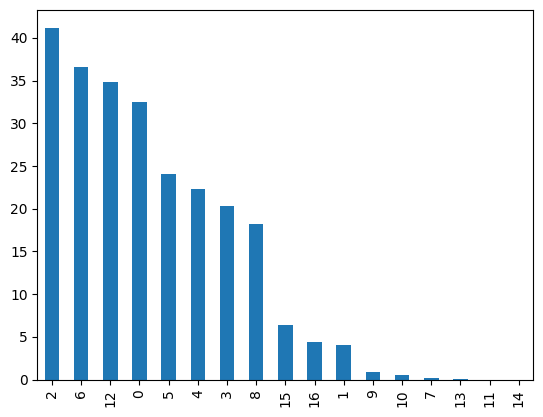

In [ ]:
import matplotlib.pyplot as plt
df['現金買入'].plot(kind='bar')
plt.show()

In [ ]:
df['幣別'].apply(lambda x: x.split()[-1])

In [ ]:
import wget
wget.download('https://github.com/roberthsu2003/__2025_01_04_chihlee__/raw/refs/heads/main/ChineseFont.ttf')

'ChineseFont.ttf'

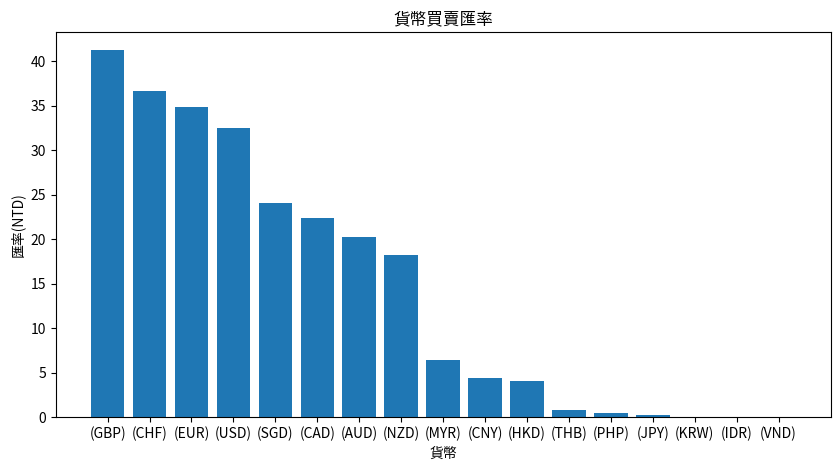

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font',family = 'ChineseFont')

# 1.製作figure
fig = plt.figure(figsize=(10, 5))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['現金買入'])
ax_1.set_title('貨幣買賣匯率')
ax_1.set_xlabel('貨幣')
ax_1.set_ylabel('匯率(NTD)')
plt.show()